In [1]:
!nvidia-smi

Mon May  2 07:07:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')
train_path = "/content/drive/MyDrive/Sony_pm25-master/data/train.csv"
test_path = "/content/drive/MyDrive/Sony_pm25-master/data/test.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
np.random.seed(0)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

plt.style.use('seaborn-whitegrid')

# this allows plots to appear directly in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# dataのダウンロード
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [6]:
# train_df
print("====== TRAIN HEAD ======")
train_df.head(10)
print("====== TRAIN TAIL ======")
train_df.tail(10)
print("====== TRAIN INFO ======")
train_df.info()

====== TRAIN HEAD ======


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,5.916,3.017,11,0.149,0.468,0.900,0.137,36,0.000,0.529,2.188,1.167,36,10.956,14.038,20.866,23.880,45,30.207,70.426,94.202,994.051,59,1004.137,1015.721,1023.398,89.588,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,3.181,4.828,1.208,49,3.092,7.572,12.332,20.524,31,0.096,0.102,16.152,61.550,45,0.099,0.301,5.411,6.401,71,24.113,30.125,36.678,37.327,50,49.034,74.276,92.975,467.112,69,938.085,970.252,1080.000,7.320,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,23.432,125.224,36,1.392,1.464,47.652,515.570,111,0.972,2.751,12.230,30.518,148,0.000,0.000,23.226,131.280,138,25.919,69.069,100.000,1292.191,153,880.000,880.000,1018.200,4655.348,125,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,38.374,304.731,50,2.957,3.230,14.056,25.630,176,14.959,17.471,24.221,20.883,101,16.423,19.819,20.044,3.188,111,73.504,86.920,100.000,85.028,141,1011.703,1016.545,1018.364,10.898,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,8.681,11.100,10.011,83,0.349,2.349,38.600,353.549,47,0.422,5.794,9.972,9.234,80,14.911,21.140,32.584,74.298,55,10.297,11.822,13.377,2.311,155,51.918,76.736,96.533,484.188,124,1019.521,1022.992,1027.611,15.142,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
5,6,2019,1,1,Australia,Wollongong,-34.42400,150.89345,179,4.554,7.159,15.819,30.752,39,0.514,11.869,54.022,696.202,41,2.681,6.005,12.218,21.026,23,10.875,16.734,41.150,217.906,67,-0.508,13.920,22.158,76.393,45,0.245,41.784,93.162,1486.537,27,880.000,1016.078,1019.685,3.467,29,0.287,0.498,3.165,2.064,42,1.591,3.102,7.398,6.293,110.224
6,7,2019,1,1,Belgium,Antwerpen,51.22047,4.40026,93,4.011,4.555,12.859,18.655,78,0.504,0.612,8.415,15.217,42,0.434,2.743,14.849,38.421,206,0.838,21.238,26.600,54.827,137,25.470,27.212,29.980,4.948,111,58.778,94.108,97.695,129.989,180,880.000,1007.568,1013.235,7.007,136,0.103,1.514,3.422,2.681,84,20.366,21.209,22.461,1.062,73.848
7,8,2019,1,1,Belgium,Charleroi,50.41136,4.44448,11,0.096,0.097,0.097,0.000,21,4.848,13.758,22.299,73.644,10,0.575,0.611,0.643,0.001,71,4.037,7.353,15.785,33.415,113,3.776,5.798,7.673,3.576,116,49.630,88.819,100.000,612.397,126,962.761,1028.804,1031.506,9.131,122,0.203,2.457,4.390,4.263,117,1.968,4.539,6.519,4.994,56.543
8,9,2019,1,1,Belgium,Liège,50.63373,5.56749,12,0.097,0.100,0.101,0.000,69,3.277,16.678,23.726,99.180,13,0.613,0.645,1.099,0.058,88,2.915,6.895,18.069,53.598,140,3.971,5.588,7.494,2.968,141,0.191,52.127,99.183,2384.795,145,981.088,1043.937,1067.125,1225.700,143,0.106,2.380,6.234,9.116,136,1.581,4.398,5.854,4.439,51.039
9,10,2019,1,1,Brazil,São Paulo,-23.54750,-46.63611,354,1.048,2.822,7.457,9.924,545,2.927,22.697,54.675,604.598,271,0.608,1.133,4.844,4.159,430,0.453,6.204,28.756,180.580,530,22.677,26.243,32.201,22.041,561,48.298,57.457,89.150,403.577,570,954.771,998.265,1043.201,106.926,577,0.198,1.419,3.956,3.415,145,17.233,18.791,21.665,4.742,67.872


====== TRAIN TAIL ======


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
195931,195932,2021,12,31,Turkey,Samsun,41.27976,36.33610,126,4.422,8.430,11.047,10.604,119,3.768,7.009,14.694,29.020,81,2.860,6.180,19.755,69.397,109,6.792,18.531,75.855,1156.755,119,2.710,10.017,11.091,16.871,115,37.991,78.100,90.691,674.350,113,947.893,1014.237,1045.136,27.852,81,0.480,1.018,6.357,8.324,99,-0.916,5.630,9.261,25.179,53.191
195932,195933,2021,12,31,Turkey,İzmit,40.76499,29.92928,143,9.383,13.062,18.026,18.157,135,7.518,14.669,25.914,78.924,142,5.205,13.313,31.819,171.389,123,2.207,12.827,36.197,277.938,147,8.120,8.466,10.531,1.322,141,83.699,85.319,93.429,23.027,145,909.144,1033.198,1080.000,10.934,136,0.526,2.003,2.943,1.418,44,6.575,7.164,8.059,0.526,55.583
195933,195934,2021,12,31,United Kingdom,Belfast,54.59682,-5.92541,15,0.191,0.287,1.238,0.266,110,4.167,19.871,25.004,104.883,71,1.675,2.696,9.750,15.857,102,1.024,9.959,24.560,132.015,126,11.404,11.922,14.026,1.671,117,75.350,84.794,96.978,113.513,127,924.328,965.870,1028.213,136.851,134,0.710,4.929,8.069,12.970,75,10.208,10.481,11.429,0.363,23.716
195934,195935,2021,12,31,United Kingdom,Cardiff,51.48000,-3.18000,123,2.237,6.055,20.274,21.664,309,1.825,26.067,51.162,162.993,123,2.297,2.726,7.182,5.570,248,5.495,8.252,26.545,107.918,317,3.902,5.876,16.902,40.246,297,30.290,65.123,80.624,613.581,361,1010.309,1016.766,1022.027,28.397,325,0.496,2.480,8.900,15.974,234,-0.495,1.768,9.249,22.464,133.977
195935,195936,2021,12,31,United Kingdom,Edinburgh,55.95206,-3.19648,39,0.387,0.591,1.248,0.179,96,12.680,30.505,34.586,112.609,57,4.845,4.987,5.058,0.011,205,0.527,10.801,33.166,254.667,281,8.081,9.882,11.864,3.480,278,82.054,95.124,96.195,48.649,293,1007.346,1008.786,1011.744,4.713,272,0.090,3.300,9.784,22.822,84,8.202,8.868,10.930,1.798,13.688
195936,195937,2021,12,31,United States,Jacksonville,30.33218,-81.65565,12,0.694,0.995,1.301,0.090,26,6.859,9.295,25.886,87.688,8,0.257,1.088,1.511,0.376,26,0.000,1.071,1.148,0.180,40,22.355,27.235,28.335,8.710,48,58.021,88.372,99.875,425.264,55,1006.476,1008.095,1016.593,17.690,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195937,195938,2021,12,31,United States,Las Vegas,36.17497,-115.13722,14,0.528,1.256,3.226,1.743,8,4.435,7.450,23.110,84.730,9,0.288,0.671,1.292,0.241,31,0.674,1.176,6.967,5.398,51,12.548,18.251,27.369,52.741,55,26.446,48.434,84.894,817.475,67,1001.251,1014.241,1016.000,26.348,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195938,195939,2021,12,31,United States,Milwaukee,43.03890,-87.90647,171,1.975,6.627,6.639,5.293,112,4.613,7.397,37.550,71.355,120,0.420,2.915,6.504,4.479,66,2.668,4.844,34.490,141.786,170,1.574,5.054,15.515,45.069,91,48.625,75.506,80.429,245.963,194,1014.899,1028.344,1028.429,9.313,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299
195939,195940,2021,12,31,Vietnam,Hanoi,21.02450,105.84117,31,2.613,2.704,8.767,4.317,108,12.694,15.474,37.831,149.726,27,0.702,2.538,4.193,2.884,149,1.986,6.741,26.674,143.871,290,4.288,5.839,18.179,20.939,260,74.620,78.477,92.574,78.444,293,1013.957,1027.707,1034.228,25.054,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642,36.523
195940,195941,2021,12,31,Vietnam,Hạ Long,20.95045,107.07336,26,0.069,0.120,0.184,0.003,20,3.119,3.140,27.941,147.380,10,0.676,0.841,0.890,0.011,51,0.885,12.055,25.679,149.594,55,19.866,24.896,27.725,15.020,71,73.216,83.655,99.708,162.663,70,1008.326,1019.149,1021.731,42.129,32,0.190,2.775,3.412,2.528,16,8.448,10.372,18.886,11.536,62.021


====== TRAIN INFO ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195941 entries, 0 to 195940
Data columns (total 54 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               195941 non-null  int64  
 1   year             195941 non-null  int64  
 2   month            195941 non-null  int64  
 3   day              195941 non-null  int64  
 4   Country          195941 non-null  object 
 5   City             195941 non-null  object 
 6   lat              195941 non-null  float64
 7   lon              195941 non-null  float64
 8   co_cnt           195941 non-null  int64  
 9   co_min           195941 non-null  float64
 10  co_mid           195941 non-null  float64
 11  co_max           195941 non-null  float64
 12  co_var           195941 non-null  float64
 13  o3_cnt           195941 non-null  int64  
 14  o3_min           195941 non-null  float64
 15  o3_mid           195941 non-null  float64
 16  o3_max       

In [7]:
# test_df
print("====== TEST HEAD ======")
test_df.head(10)
print("====== TEST TAIL ======")
test_df.tail(10)
print("====== TEST INFO ======")
test_df.info()

====== TEST HEAD ======


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,195942,2019,1,1,Australia,Adelaide,-34.92866,138.59863,155,0.091,0.101,0.195,0.003,167,0.000,0.000,0.000,0.000,12,0.095,0.098,0.106,0.000,118,0.097,0.099,0.105,0.000,168,13.226,23.461,33.922,104.054,180,17.795,34.081,90.636,1282.735,154,934.478,944.740,1029.990,11.067,111,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705
1,195943,2019,1,1,Australia,Sydney,-33.86785,151.20732,23,1.037,2.272,3.391,1.347,142,7.797,34.414,59.489,630.329,54,1.476,1.531,5.380,3.709,147,1.139,4.117,24.680,132.975,176,21.676,27.487,36.453,52.606,177,30.139,55.590,87.970,805.448,184,979.216,1008.498,1014.100,65.343,158,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857
2,195944,2019,1,1,Belgium,Brussels,50.85045,4.34878,28,0.096,0.101,0.104,0.000,114,7.064,16.576,27.246,97.445,9,0.566,0.600,0.626,0.000,151,1.362,5.372,16.268,53.080,172,5.402,7.786,9.754,4.564,163,70.948,80.069,96.067,148.232,159,936.950,1047.096,1080.000,19.318,64,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415
3,195945,2019,1,1,Bosnia and Herzegovina,Sarajevo,43.84864,18.35644,122,0.479,4.589,16.560,60.820,118,0.513,22.445,51.638,625.291,138,1.551,12.523,60.551,819.667,141,0.467,7.609,30.975,221.357,132,-4.840,0.976,4.849,22.794,139,55.585,100.000,100.000,479.874,132,950.173,985.215,1043.932,76.454,149,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049
4,195946,2019,1,1,Brazil,São José dos Campos,-23.17944,-45.88694,158,6.198,13.478,20.327,36.498,129,1.063,1.845,27.894,166.269,92,1.568,4.365,14.958,42.456,126,9.118,16.171,48.517,354.133,102,5.526,7.388,21.291,57.069,123,68.233,87.176,99.879,237.783,131,1001.341,1015.044,1017.836,50.092,164,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546
5,195947,2019,1,1,Canada,Surrey,49.10635,-122.82509,64,0.834,3.033,5.288,4.234,28,10.826,16.987,25.901,54.775,11,0.315,0.711,2.623,1.295,38,0.937,3.614,5.362,4.766,58,-6.060,3.963,17.141,123.864,92,24.275,48.303,67.127,446.695,64,880.000,880.000,1025.832,12.992,33,0.077,2.123,3.455,2.704,57,-5.923,-5.628,-3.510,1.419
6,195948,2019,1,1,Chile,Concepción,-36.82699,-73.04977,99,2.057,5.682,15.632,38.288,54,0.332,11.949,77.220,102.629,59,2.898,4.416,7.162,4.421,174,6.357,14.727,37.068,228.785,123,-1.066,-0.411,-0.112,0.222,95,0.000,0.000,0.882,0.190,145,880.000,880.000,880.000,0.000,179,0.295,0.496,1.656,0.451,25,-14.514,-0.832,14.089,192.203
7,195949,2019,1,1,Chile,Santiago,-33.45694,-70.64827,169,0.387,7.051,205.235,9506.204,156,0.814,21.873,63.392,945.691,67,0.507,1.821,8.265,14.634,190,1.074,9.696,25.585,145.531,249,13.473,24.340,32.327,86.433,231,15.663,34.591,78.225,894.537,239,1028.031,1036.073,1054.105,112.578,200,0.994,3.646,8.683,14.402,213,1.879,4.780,9.385,13.236
8,195950,2019,1,1,China,Changchun,43.88000,125.32278,45,0.094,0.142,0.169,0.000,48,0.383,4.817,18.453,78.754,102,0.626,0.804,0.846,0.012,118,2.516,14.306,18.201,59.361,205,21.845,28.716,35.874,45.294,193,46.421,80.930,100.000,496.043,166,1015.339,1015.432,1018.496,2.429,178,0.994,1.147,4.818,3.507,37,19.701,19.835,26.819,6.795
9,195951,2019,1,1,China,Chongqing,29.56278,106.55278,213,1.939,6.794,11.505,20.823,283,1.249,3.347,23.154,110.875,269,1.092,3.557,9.469,16.382,339,3.340,16.743,25.984,123.784,260,4.077,4.484,5.785,0.678,246,67.784,84.268,88.089,98.579,239,1014.572,1031.849,1041.338,173.401,234,0.493,1.394,2.488,0.968,96,0.967,2.071,2.657,0.694


====== TEST TAIL ======


,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,o3_max,o3_var,so2_cnt,so2_min,so2_mid,so2_max,so2_var,no2_cnt,no2_min,no2_mid,no2_max,no2_var,temperature_cnt,temperature_min,temperature_mid,temperature_max,temperature_var,humidity_cnt,humidity_min,humidity_mid,humidity_max,humidity_var,pressure_cnt,pressure_min,pressure_mid,pressure_max,pressure_var,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
53499,249441,2021,12,31,South Korea,Suwon,37.29111,127.00889,58,4.649,9.901,10.500,8.334,155,0.181,3.896,36.175,315.297,177,2.748,2.956,9.861,12.320,100,9.221,10.672,29.329,96.793,109,-1.285,10.151,16.095,10.878,107,65.305,93.001,94.281,201.708,113,1018.057,1018.370,1023.571,7.299,128,0.499,0.884,2.801,1.226,71,0.817,10.594,13.667,2.530
53500,249442,2021,12,31,Spain,Burgos,42.34106,-3.70184,123,0.048,0.128,0.720,0.108,42,0.692,23.864,25.225,146.423,12,0.090,0.221,1.297,0.355,104,1.209,20.515,41.252,379.699,216,5.735,6.235,18.168,37.623,194,41.986,71.851,92.728,626.046,221,1018.637,1027.662,1028.590,24.117,294,0.124,3.105,11.574,18.215,34,0.846,2.828,4.709,3.628
53501,249443,2021,12,31,Taiwan,Douliu,23.70944,120.54333,122,2.496,4.205,8.557,8.501,112,5.048,23.733,45.879,403.950,126,1.064,3.125,7.754,10.818,114,6.021,11.049,19.085,23.259,116,13.023,16.595,23.874,28.549,111,46.091,75.117,82.894,325.854,121,989.056,1029.122,1052.574,18.090,106,0.203,2.413,6.917,10.817,20,7.341,12.790,13.178,8.056
53502,249444,2021,12,31,Taiwan,Tainan,22.99083,120.21333,120,2.375,4.344,7.787,6.966,128,10.835,25.387,49.657,360.388,168,1.001,3.358,7.096,8.758,152,5.735,12.683,23.824,75.286,150,12.139,16.571,23.370,30.107,149,55.275,71.655,92.403,330.857,175,962.266,983.753,1028.763,13.570,134,0.378,2.521,6.109,7.899,139,7.765,11.087,11.453,3.307
53503,249445,2021,12,31,Thailand,Samut Prakan,13.59934,100.59675,43,0.099,0.100,0.104,0.000,43,1.598,13.022,27.796,160.519,19,3.705,6.375,6.595,2.030,46,4.599,10.722,23.877,90.336,49,22.966,27.236,29.660,10.852,48,43.463,77.303,86.757,456.316,47,993.405,1005.739,1007.877,17.382,47,0.283,3.102,7.844,13.807,22,17.783,18.180,21.900,4.167
53504,249446,2021,12,31,Turkey,Adana,36.98615,35.32531,97,4.674,9.034,14.650,23.900,90,11.798,21.871,28.693,67.294,88,3.699,7.816,44.080,391.178,83,0.829,5.287,42.481,417.102,92,8.354,12.533,18.784,26.241,94,34.495,47.605,73.066,352.286,95,914.666,963.444,1080.000,3.863,93,0.201,2.878,7.397,12.130,86,0.451,3.112,4.512,3.938
53505,249447,2021,12,31,Turkey,Bursa,40.19559,29.06013,123,17.621,18.156,21.877,4.390,116,0.882,6.559,14.794,46.421,109,4.295,8.558,59.418,706.550,104,8.884,14.335,30.304,111.588,112,5.241,9.273,11.543,9.674,118,71.775,83.258,100.000,190.221,105,989.638,1008.551,1024.879,35.258,114,0.473,1.491,2.974,1.468,115,3.894,6.823,6.861,2.145
53506,249448,2021,12,31,Turkey,Trabzon,41.00500,39.72694,150,0.128,14.275,21.124,0.315,108,0.476,9.539,33.956,175.614,100,0.074,2.970,7.959,14.297,263,2.800,10.818,32.341,208.883,202,6.784,12.701,16.167,21.408,112,43.466,75.428,87.317,466.464,111,1002.984,1009.004,1025.333,37.266,179,1.001,3.605,5.040,3.965,12,5.269,8.772,12.661,13.201
53507,249449,2021,12,31,United Kingdom,London,51.50853,-0.12574,21,0.057,0.111,2.088,0.988,54,0.301,2.029,24.479,138.410,40,0.230,0.478,0.884,0.102,77,1.326,9.441,9.838,17.650,111,10.690,16.795,18.424,14.548,66,44.049,84.531,94.643,603.074,118,1012.094,1019.240,1024.880,28.607,41,0.077,0.803,3.884,3.268,34,10.906,10.959,12.744,0.822
53508,249450,2021,12,31,Vietnam,Haiphong,20.86481,106.68345,47,0.060,0.071,0.136,0.000,134,9.491,19.852,24.678,55.554,19,1.544,2.441,6.277,5.352,44,1.153,8.646,14.952,44.975,427,20.111,25.368,28.187,15.394,107,63.503,83.249,94.011,223.148,280,1005.977,1008.091,1013.454,8.356,178,0.105,2.931,15.303,22.760,58,9.825,15.037,22.294,11.189


====== TEST INFO ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53509 entries, 0 to 53508
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               53509 non-null  int64  
 1   year             53509 non-null  int64  
 2   month            53509 non-null  int64  
 3   day              53509 non-null  int64  
 4   Country          53509 non-null  object 
 5   City             53509 non-null  object 
 6   lat              53509 non-null  float64
 7   lon              53509 non-null  float64
 8   co_cnt           53509 non-null  int64  
 9   co_min           53509 non-null  float64
 10  co_mid           53509 non-null  float64
 11  co_max           53509 non-null  float64
 12  co_var           53509 non-null  float64
 13  o3_cnt           53509 non-null  int64  
 14  o3_min           53509 non-null  float64
 15  o3_mid           53509 non-null  float64
 16  o3_max           53509 non-null  f

In [8]:
train_df = train_df.drop("City", axis=1)
test_df = test_df.drop("City", axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = []
categorical_dims =  {}
for col in train_df.columns[train_df.dtypes == "object"]:
  print(col, train_df[col].nunique())
  cat_encoder = LabelEncoder()
  train_df[col] = cat_encoder.fit_transform(train_df[col])
  test_df[col] = cat_encoder.transform(test_df[col])
  categorical_columns.append(col)
  categorical_dims[col] = len(cat_encoder.classes_)

Country 30


In [10]:
!pip install pytorch-tabnet
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor

In [11]:
import torch
tabnet_params = dict(n_d=8, n_a=8, n_steps=3, gamma=1.3,
                    n_independent=2, n_shared=2,
                    seed=0, lambda_sparse=1e-3, 
                    optimizer_fn=torch.optim.Adam, 
                    optimizer_params=dict(lr=2e-2),
                    mask_type="entmax",
                    scheduler_params=dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
                    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                    verbose=5)
pretrainer = TabNetPretrainer(**tabnet_params)
pretrainer.fit(
    X_train=train_df.drop(['id', 'pm25_mid'],axis=1).values,
    eval_set=[train_df.drop(['id', 'pm25_mid'],axis=1).values],
    max_epochs=200,
    patience=20, batch_size=256, virtual_batch_size=128,
    num_workers=1, drop_last=True)

Device used : cuda
epoch 0  | loss: 18594.39004| val_0_unsup_loss: 47976.25391|  0:00:43s
epoch 5  | loss: 2.34841 | val_0_unsup_loss: 35346.83203|  0:03:36s
epoch 10 | loss: 1.50071 | val_0_unsup_loss: 35917.05078|  0:06:30s
epoch 15 | loss: 1.56744 | val_0_unsup_loss: 404.90793|  0:09:22s
epoch 20 | loss: 1.26154 | val_0_unsup_loss: 1444.1134|  0:12:14s
epoch 25 | loss: 1.09888 | val_0_unsup_loss: 1737.75037|  0:15:06s
epoch 30 | loss: 0.99187 | val_0_unsup_loss: 20781.85938|  0:17:58s
epoch 35 | loss: 0.99316 | val_0_unsup_loss: 22019.32617|  0:20:56s
epoch 40 | loss: 0.88267 | val_0_unsup_loss: 9442.64258|  0:23:51s
epoch 45 | loss: 1.01719 | val_0_unsup_loss: 24809.98828|  0:26:43s
epoch 50 | loss: 0.82349 | val_0_unsup_loss: 25090.59961|  0:29:36s

Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_0_unsup_loss = 176.70747
Best weights from best epoch are automatically used!


In [12]:
unused_feat = ['id']
target = "pm25_mid"
features = [ col for col in train_df.columns if col not in unused_feat+[target]] 
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
# define your embedding sizes : here just a random choice
cat_emb_dim = [5]

clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)

Device used : cuda


In [13]:
# from pytorch_tabnet.augmentations import RegressionSMOTE
# aug = RegressionSMOTE(p=0.2)

from pytorch_tabnet.utils import define_device
class RegressionSMOTE():
  """
  Apply SMOTE
  This will average a percentage p of the elements in the batch with other elements.
  The target will be averaged as well (this might work with binary classification
  and certain loss), following a beta distribution.
  """
  def __init__(self, device_name="auto", p=0.8, alpha=0.5, beta=0.5, seed=0):
    self.seed = seed
    self._set_seed()
    self.device = define_device(device_name)
    self.alpha = alpha
    self.beta = beta
    self.p = p
    if (p < 0.) or (p > 1.0):
      raise ValueError("Value of p should be between 0. and 1.")

  def _set_seed(self):
    torch.manual_seed(self.seed)
    np.random.seed(self.seed)
    return

  def __call__(self, X, y):
    batch_size = X.shape[0]
    random_values = torch.rand(batch_size, device=self.device)
    idx_to_change = random_values < self.p

    # ensure that first element to switch has probability > 0.5
    np_betas = np.random.beta(self.alpha, self.beta, batch_size) / 2 + 0.5
    random_betas = torch.from_numpy(np_betas).to(self.device).float()
    index_permute = torch.randperm(batch_size, device=self.device)

    X[idx_to_change] = random_betas[idx_to_change, None] * X[idx_to_change]
    X[idx_to_change] += (1 - random_betas[idx_to_change, None]) * X[index_permute][idx_to_change].view(X[idx_to_change].size()) # noqa

    y[idx_to_change] = random_betas[idx_to_change, None] * y[idx_to_change]
    y[idx_to_change] += (1 - random_betas[idx_to_change, None]) * y[index_permute][idx_to_change].view(y[idx_to_change].size()) # noqa

    return X, y
aug = RegressionSMOTE(p=0.2)


[CHECK POINT]: START  1 "fold"

epoch 0  | loss: 1523.9449| train_rmsle: 0.31308 | train_mae: 23.03638| train_rmse: 32.37769| train_mse: 1048.31468| valid_rmsle: 0.31227 | valid_mae: 23.08645| valid_rmse: 32.66015| valid_mse: 1066.68566|  0:00:17s
epoch 1  | loss: 676.39753| train_rmsle: 0.31358 | train_mae: 21.65427| train_rmse: 28.75762| train_mse: 827.00059| valid_rmsle: 0.31005 | valid_mae: 21.59309| valid_rmse: 29.3778 | valid_mse: 863.05485|  0:00:30s
epoch 2  | loss: 610.21415| train_rmsle: 0.30535 | train_mae: 21.28859| train_rmse: 27.67154| train_mse: 765.71392| valid_rmsle: 0.30198 | valid_mae: 21.23281| valid_rmse: 27.75804| valid_mse: 770.50881|  0:00:40s
epoch 3  | loss: 576.1936| train_rmsle: 0.20197 | train_mae: 17.40001| train_rmse: 23.8534 | train_mse: 568.98463| valid_rmsle: 0.20044 | valid_mae: 17.40402| valid_rmse: 23.93404| valid_mse: 572.83831|  0:00:49s
epoch 4  | loss: 554.2905| train_rmsle: 0.18224 | train_mae: 16.59004| train_rmse: 23.05769| train_mse: 531.65

Text(0.5, 1.0, 'mask 0')

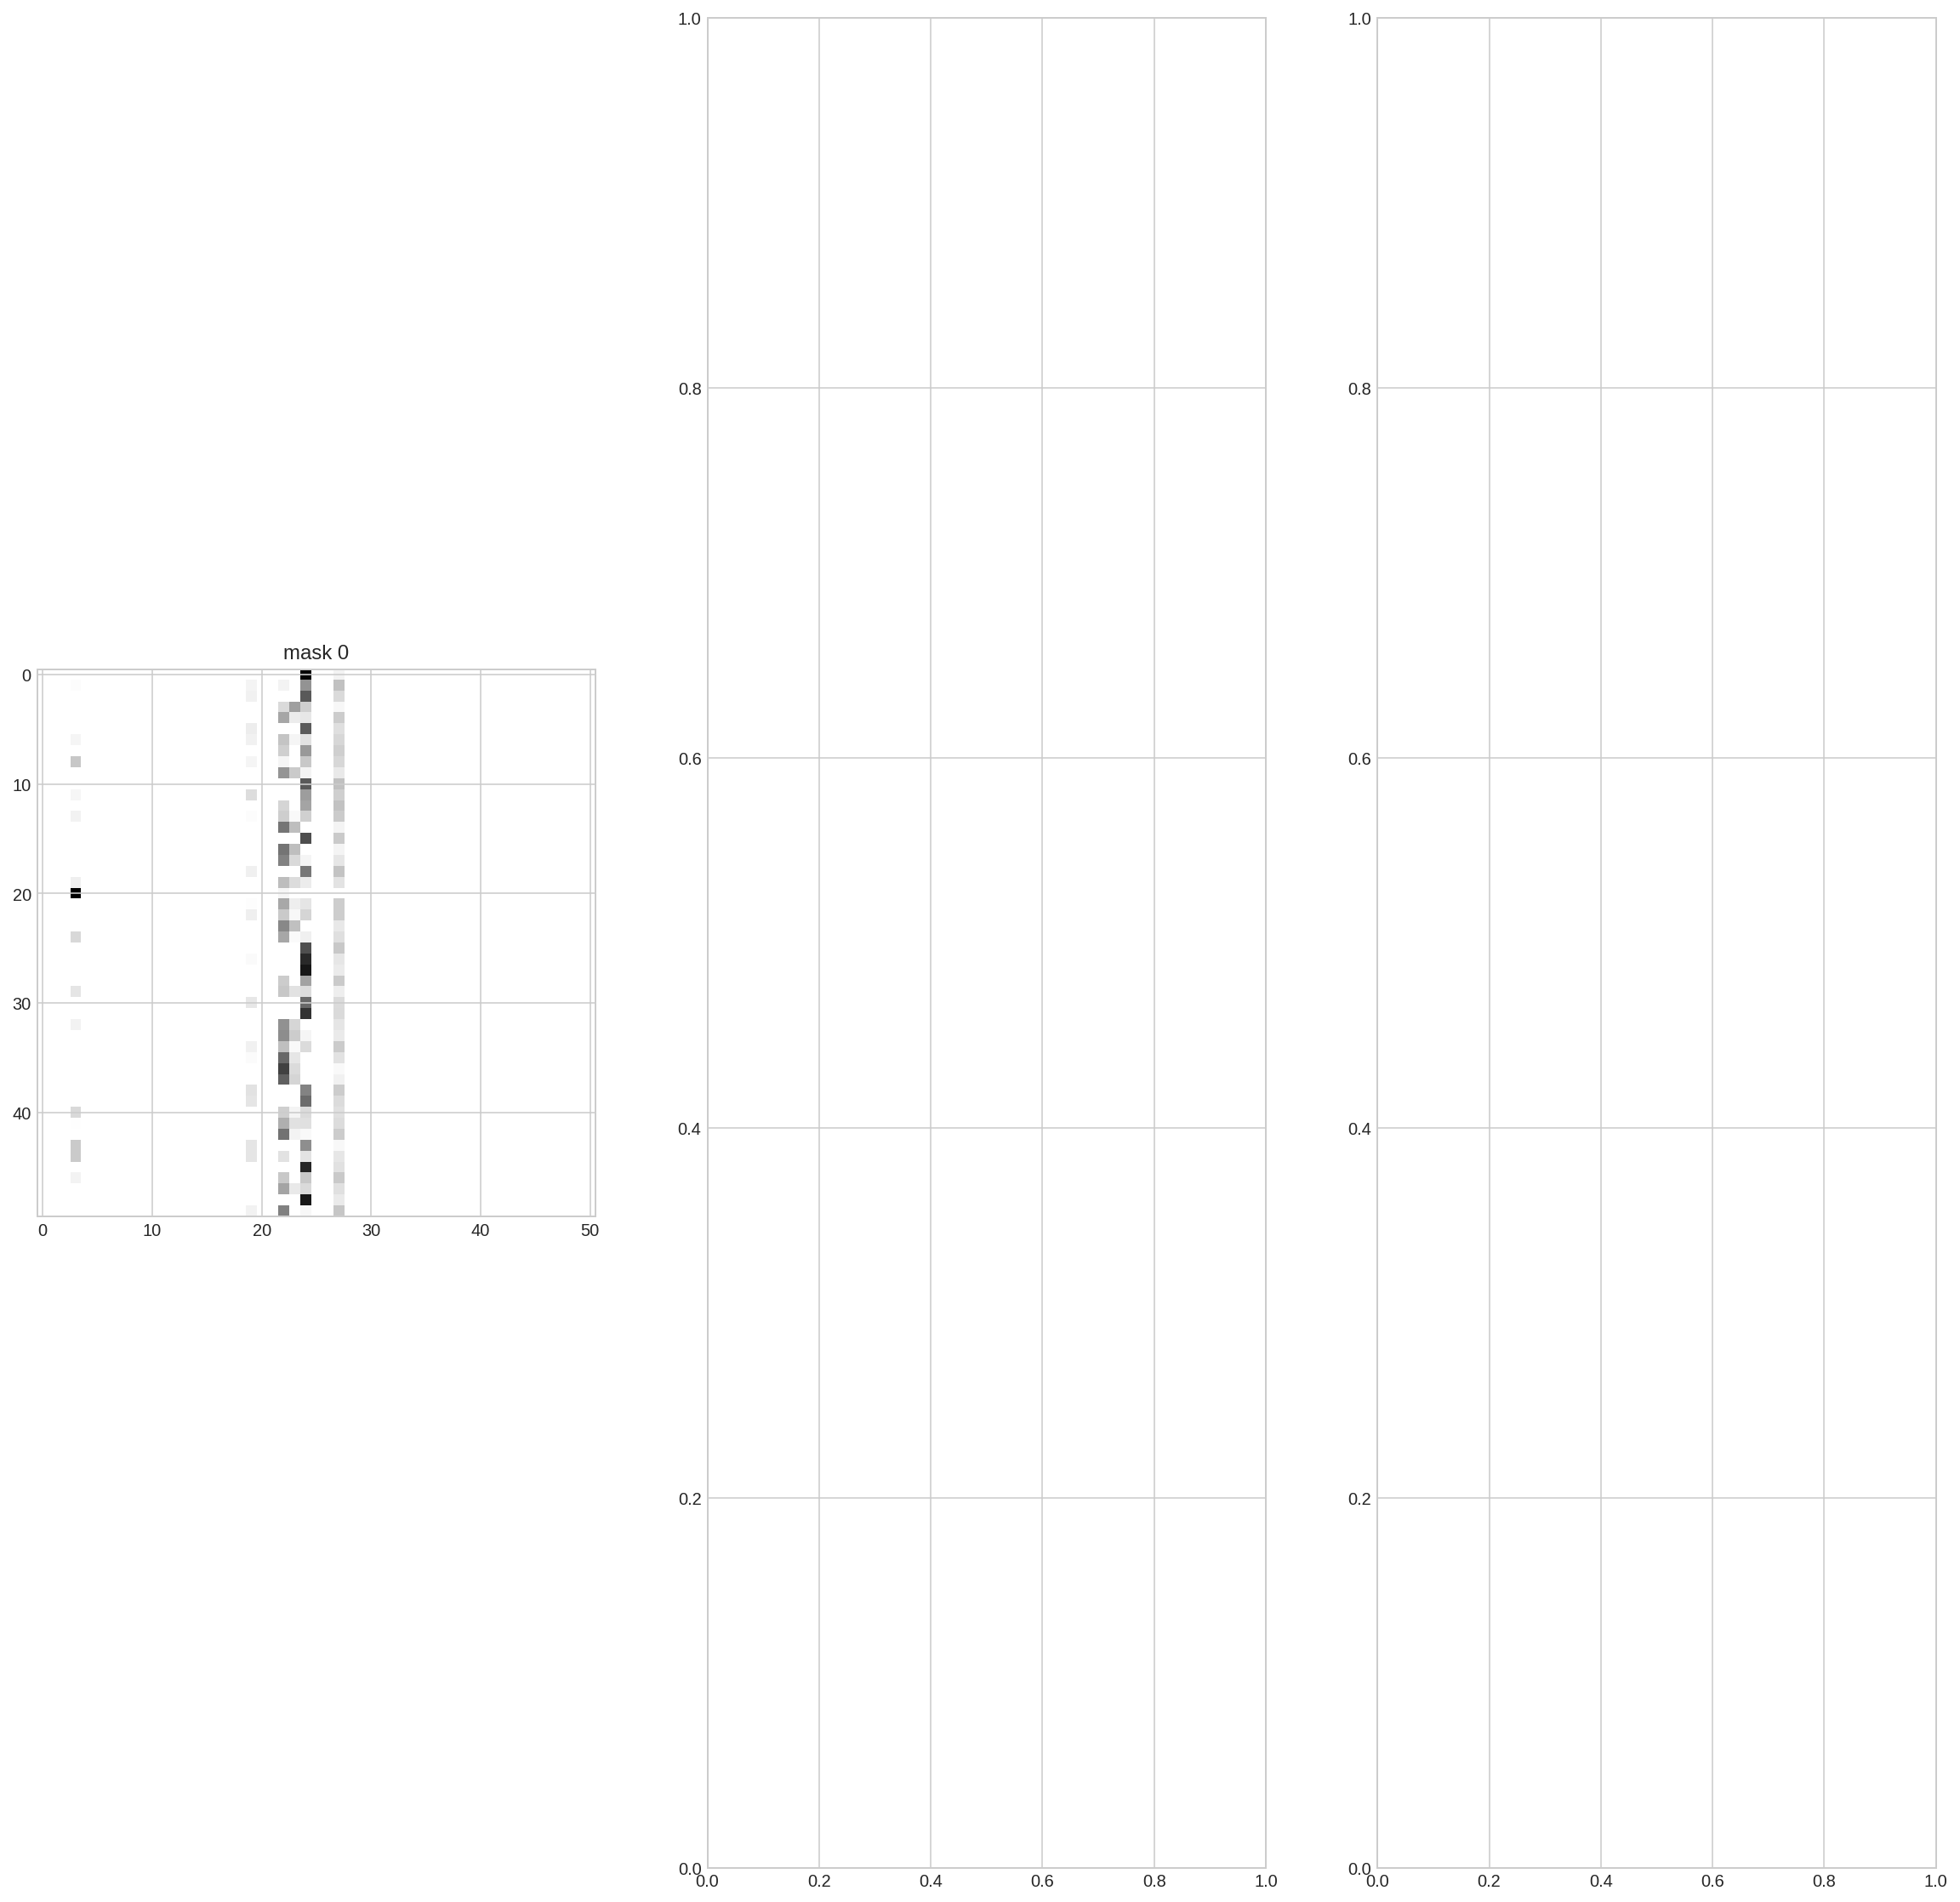

Text(0.5, 1.0, 'mask 1')

Text(0.5, 1.0, 'mask 2')

Mon May  2 07:55:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   3420MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# データの分割と学習
# Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
train_X = train_df.drop("pm25_mid", axis=1)
train_y = train_df["pm25_mid"]
num_folds = 5
kf=KFold(n_splits=num_folds, shuffle=True, random_state=0)
clf_list = []
for random_seed, (train_index, val_index) in enumerate(kf.split(train_X)):
  print("\n[CHECK POINT]: START ", random_seed+1, "\"fold\"\n")
  X_train = train_X.iloc[train_index].drop("id", axis=1).reset_index(drop=True)
  y_train = pd.DataFrame(np.array(train_y.iloc[train_index]).reshape(-1,1), columns=['pm25_mid']).reset_index(drop=True)
  X_valid = train_X.iloc[val_index].drop("id", axis=1).reset_index(drop=True)
  y_valid = pd.DataFrame(np.array(train_y.iloc[val_index]).reshape(-1,1), columns=['pm25_mid']).reset_index(drop=True)

  clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['rmsle', 'mae', 'rmse', 'mse'],
    max_epochs=100,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    # augmentations=aug, #aug
  ) 
  clf_list.append(clf)

  preds = clf.predict(X_valid.values)
  valid_score = np.sqrt(mean_squared_error(y_pred=preds, y_true=y_valid))
  print("valid score: ", valid_score)

  print("feature_importances: ", clf.feature_importances_)
  explain_matrix, masks = clf.explain(test_df.drop("id", axis=1).values)
  fig, axs = plt.subplots(1, 3, figsize=(20,20))
  for i in range(3):
      axs[i].imshow(masks[i][:50])
      axs[i].set_title(f"mask {i}")
      plt.show()

  !nvidia-smi
  print("\n[CHECK POINT]: END ", random_seed+1, "\"fold\"\n")